In [43]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [44]:
def generate_dataset(μ1, μ2, α, β, σ, N=10):
    xvec = np.random.uniform(μ1, μ2, N)
    yvec = α + β*xvec + np.random.normal(size=N)*σ
    return pd.DataFrame({'x': xvec, 'y': yvec})

In [5]:
df = generate_dataset(0.0, 1.0, 0.1, 0.8, 0.1)

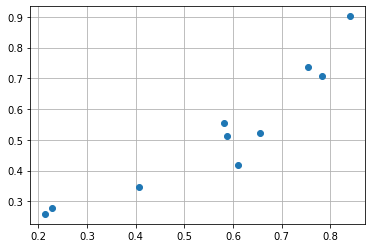

In [6]:
plt.plot(df['x'], df['y'], 'o')
plt.grid()

In [16]:
def plot_distribution(α, β, σ, N=100000, μ1=0.0, μ2=1.0):
    xvec = np.random.uniform(μ1, μ2, N)
    yvec = α + β*xvec + np.random.normal(size=N)*σ
    plt.plot(xvec, yvec, '.r', alpha=0.005)
    plt.plot(xvec, α + β*xvec, color='black')

# missing ridge line

In [17]:
import statsmodels

In [18]:
μ1 = 0
μ2 = 1.0
α = 0.1
β = 0.8
σ = 0.2
N = 20
K = 1000


In [19]:
import statsmodels.formula.api as smf

In [20]:
df = generate_dataset(μ1, μ2, α, β, σ, N=N)


In [22]:
res = smf.ols(formula='y ~ x + 1', data=df).fit()
params = res.params
αhat = params['Intercept']
βhat = params['x']
σhat = res.resid.std()

In [42]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     40.48
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           5.41e-06
Time:                        04:02:36   Log-Likelihood:                 7.6662
No. Observations:                  20   AIC:                            -11.33
Df Residuals:                      18   BIC:                            -9.341
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1210      0.077      1.565      0.135      -0.041       0.283
x              0.7941      0.125      6.362      0.000       0.532       1.056
==============================================================================
Omnibus:                        1.410   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.890
Skew:                          -0.081   Prob(JB):                        0.641
Kurtosis:                       1.979   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
res.predict(df['x'])

0     0.326200
1     0.211704
2     0.798819
3     0.603306
4     0.573319
5     0.823919
6     0.740622
7     0.503227
8     0.292622
9     0.489566
10    0.138720
11    0.355157
12    0.594171
13    0.883917
14    0.266229
15    0.827021
16    0.912376
17    0.163088
18    0.684858
19    0.732782
dtype: float64

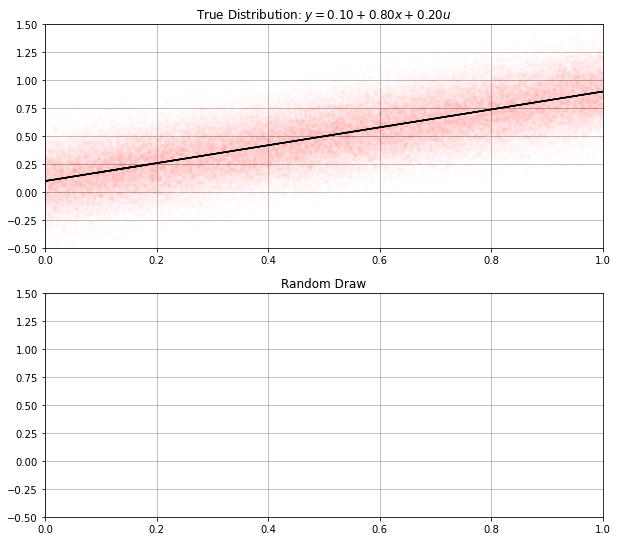

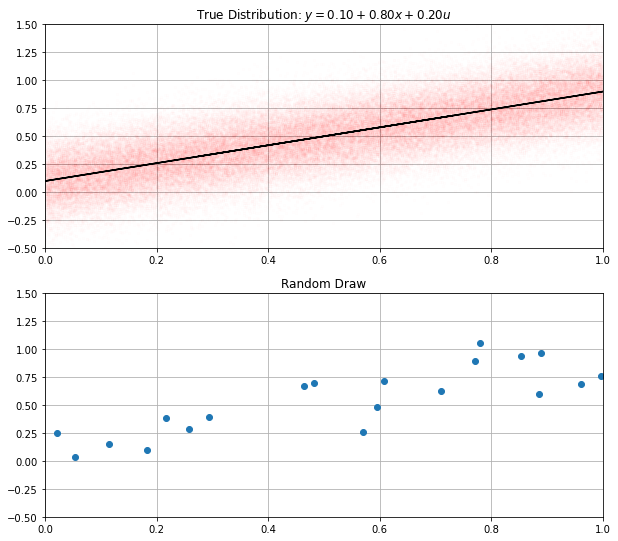

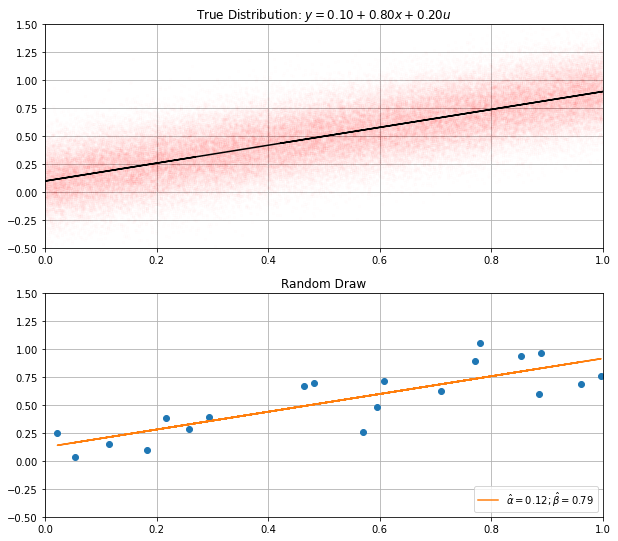

In [34]:
for i in [1,2,3]:
    
    fig = plt.figure(figsize=(10,14))
    plt.subplot(311)
    plot_distribution(0.1, 0.8, 0.2)
    plt.grid()
    plt.title(f"True Distribution: $y = {α:.2f} + {β:.2f} x + {σ:.2f} u$")
    plt.xlim(0,1)
    plt.ylim(-0.5, 1.5)

    plt.subplot(312)
    plt.xlim(0,1)
    plt.ylim(-0.5, 1.5)
    if i>=2:
        plt.plot(df['x'], df['y'], 'o')
    if i>=3:
        plt.plot(df['x'], res.predict(), label=f'$\hat{{α}}={αhat:.2f}; \hat{{β}}={βhat:.2f}$')
        plt.legend(loc='lower right')
    plt.title("Random Draw")
    plt.grid()
    
    plt.savefig(f"regression_uncertainty_{i}.png")


In [37]:
import scipy.stats


In [38]:
datasets = [generate_dataset(μ1, μ2, αhat, βhat, σhat, N=N) for i in range(K)]
all_params = [smf.ols(formula='x ~ y + 1', data=df).fit() for df in datasets]
αvec = np.array( [e.params['Intercept'] for e in all_params] )
βvec = np.array( [e.params['y'] for e in all_params] )

In [39]:
gkd = scipy.stats.kde.gaussian_kde(βvec)

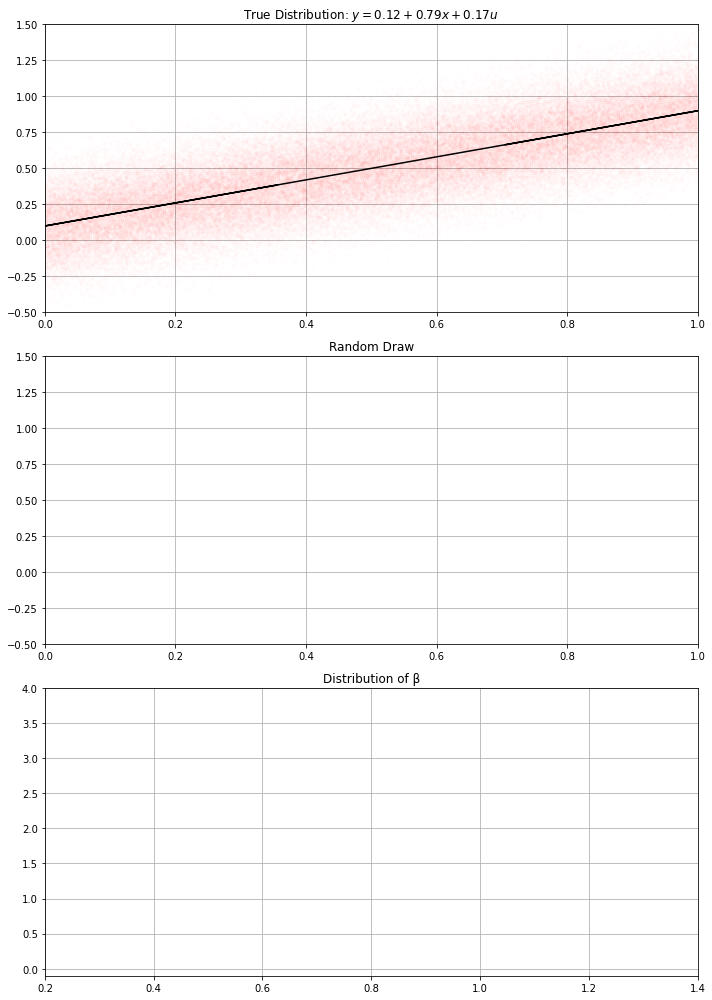

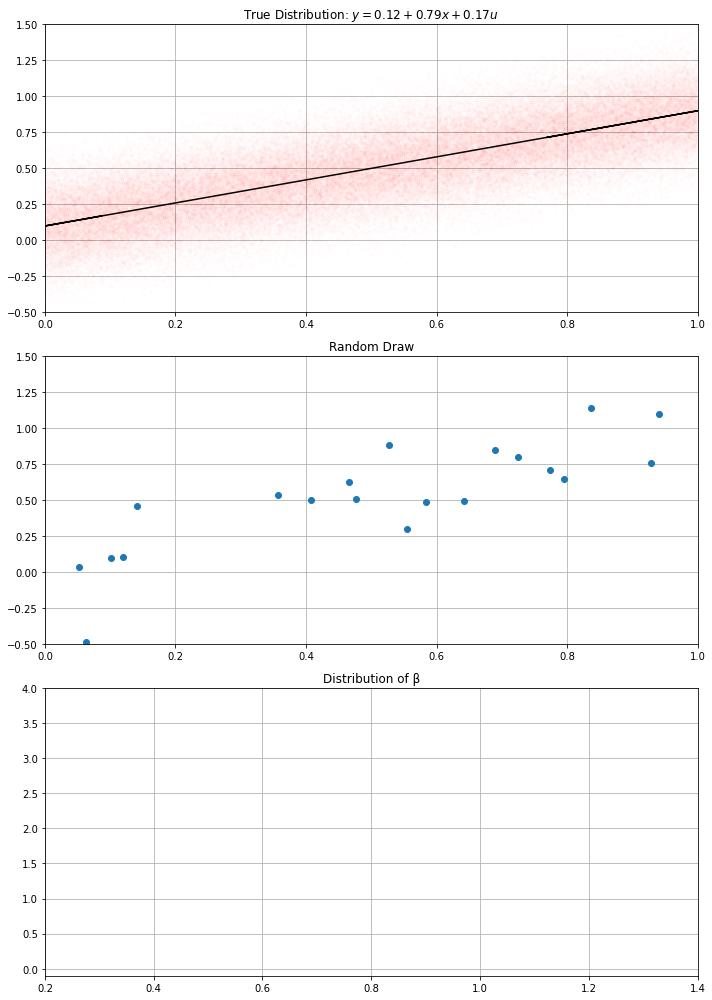

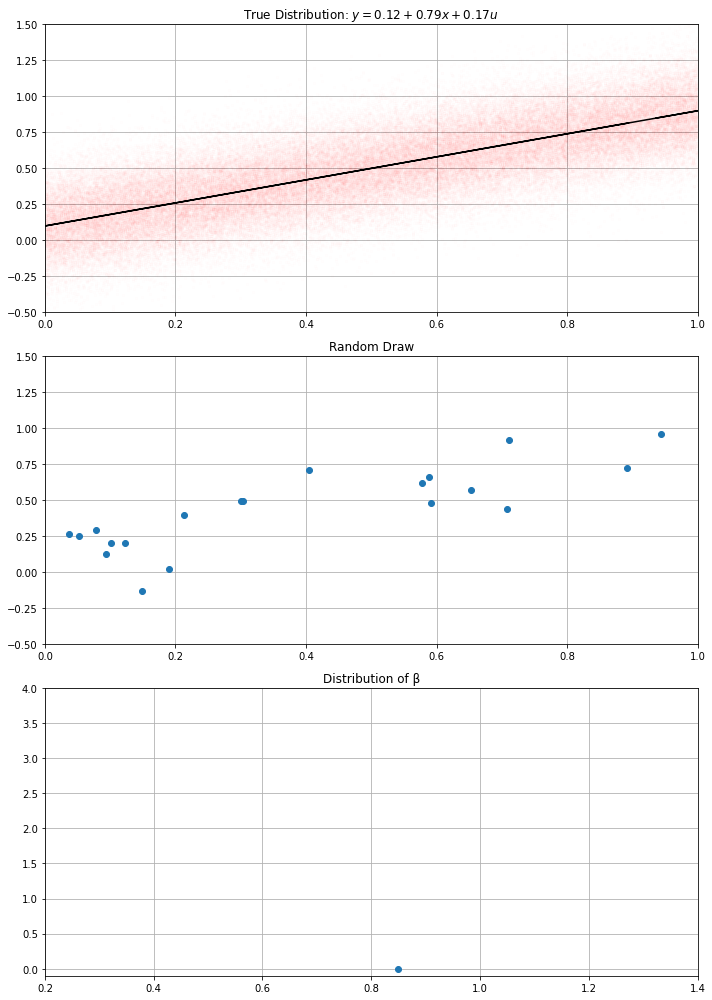

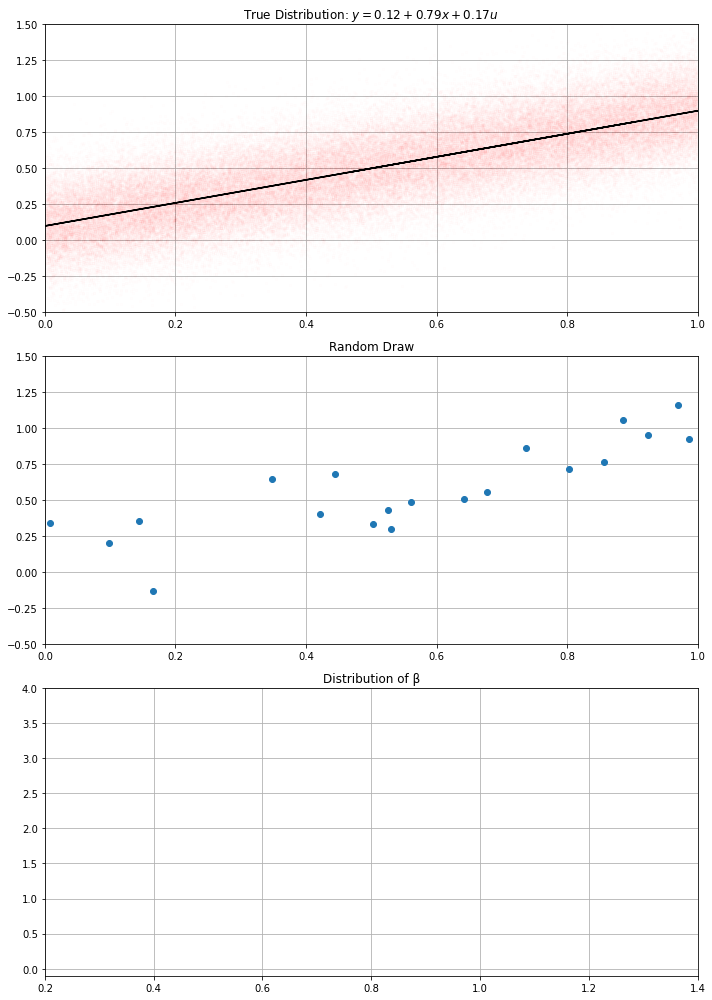

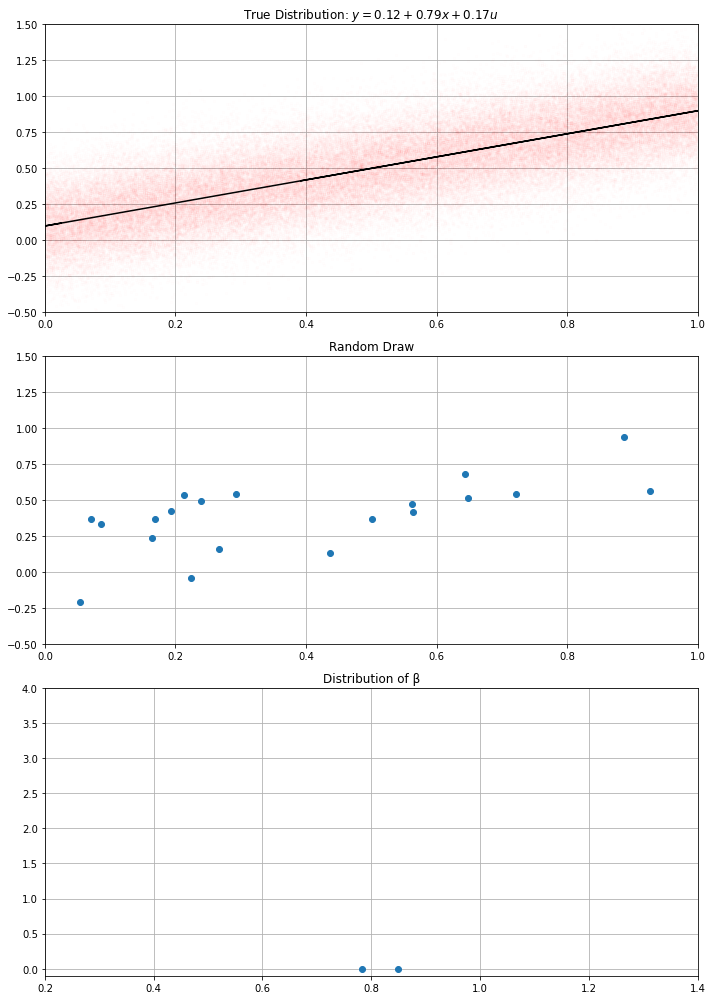

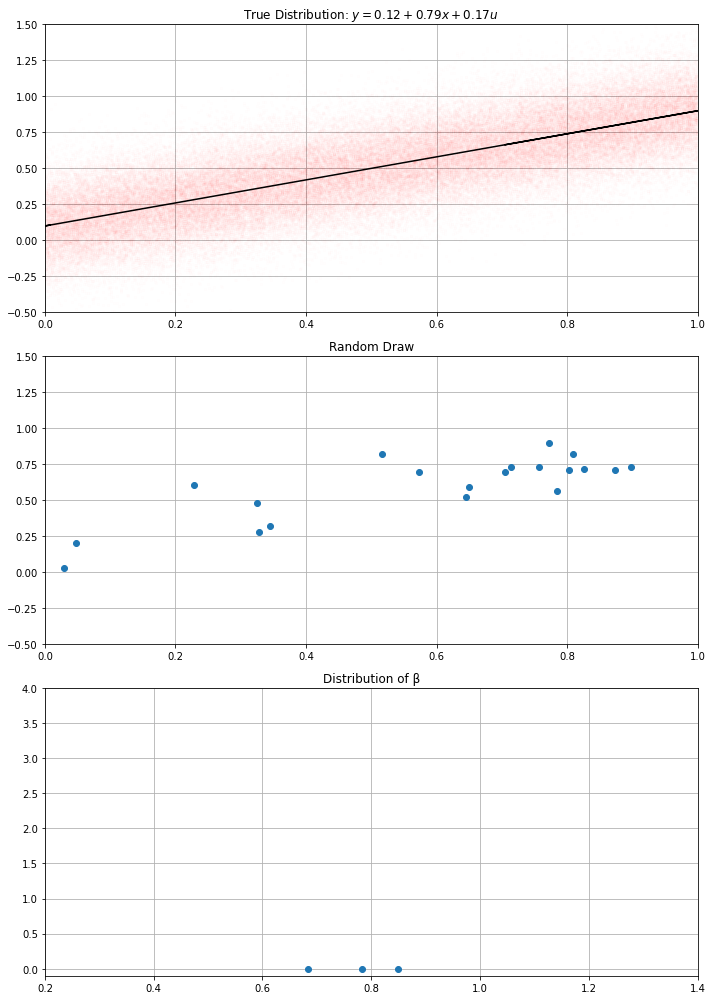

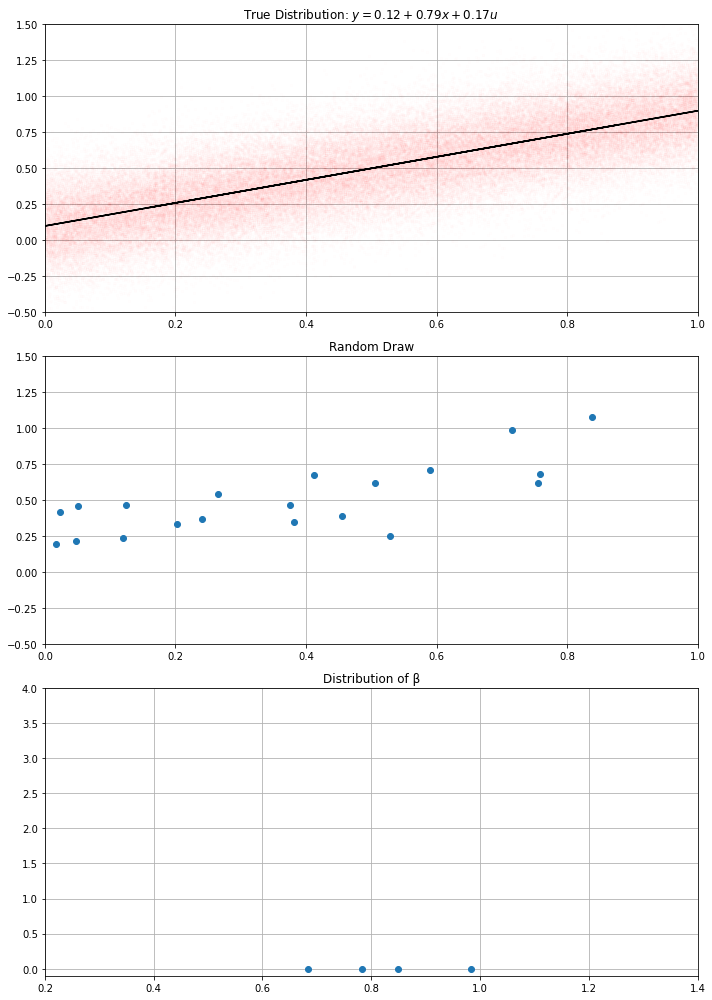

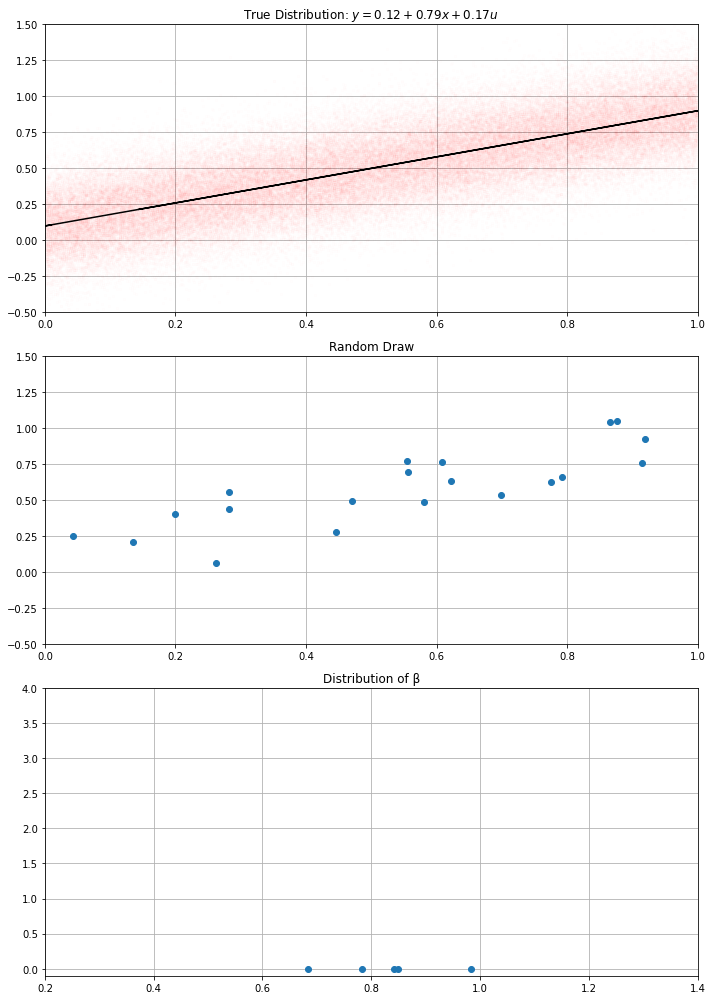

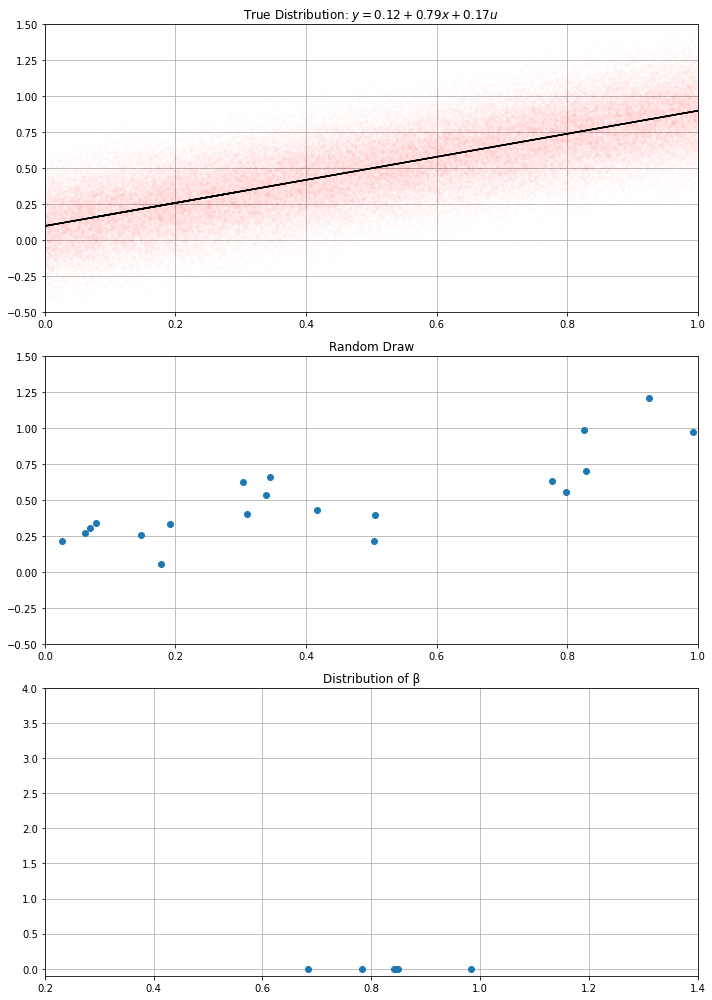

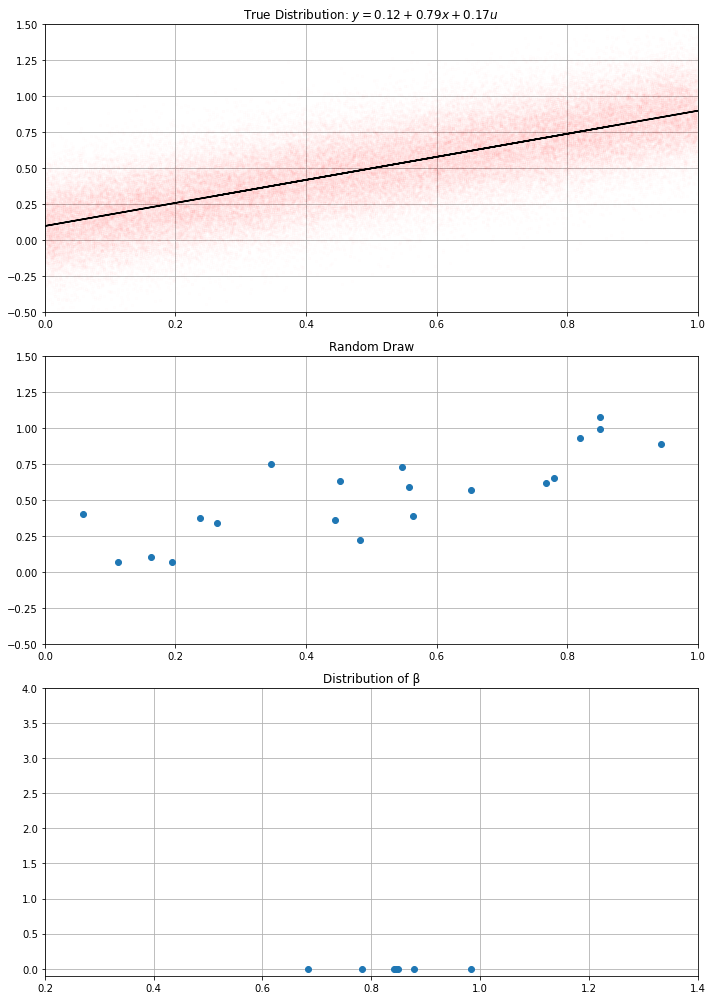

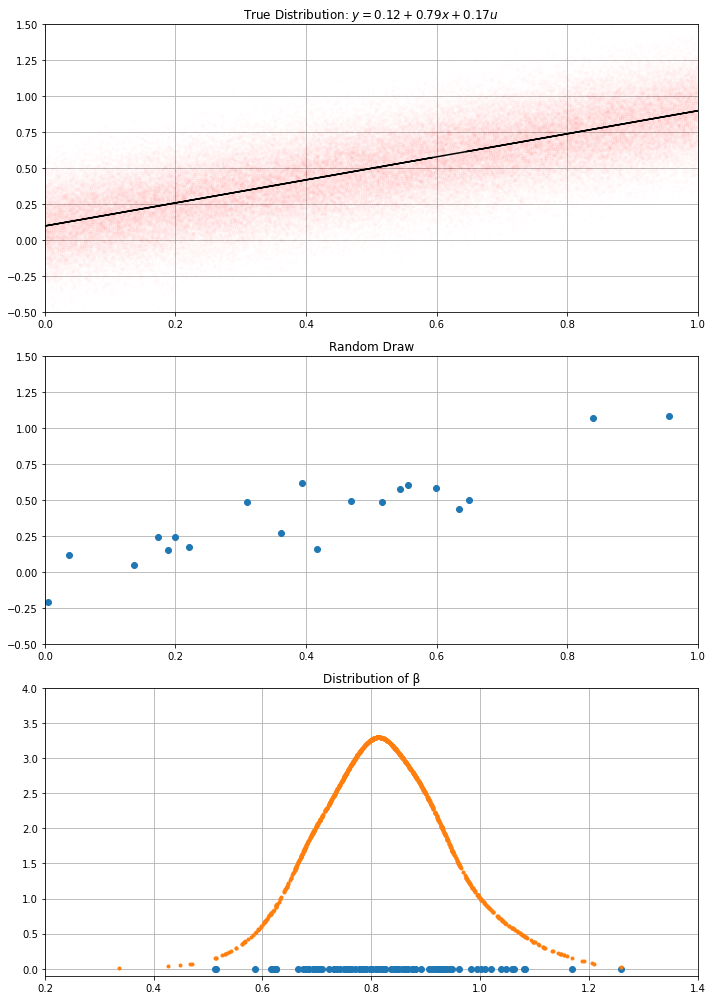

In [40]:
for i in [1,2,3,4,5,6,7,8,9,10,100]:

    fig = plt.figure(figsize=(10,14))
    plt.subplot(311)
    plot_distribution(0.1, 0.8, 0.2)
    plt.grid()
    plt.title(f"True Distribution: $y = {αhat:.2f} + {βhat:.2f} x + {σhat:.2f} u$")
    plt.xlim(0,1)
    plt.ylim(-0.5, 1.5)
    
    plt.subplot(312)
    plt.xlim(0,1)
    plt.ylim(-0.5, 1.5)
    df = datasets[i]
    if i>=2:
        plt.plot(df['x'], df['y'], 'o')
    plt.title("Random Draw")
    plt.grid()

    plt.subplot(313)
    if i==3:
        plt.plot(βvec[i], βvec[i]*0, 'o')
    if i>4:
        plt.plot(βvec[3:i], βvec[3:i]*0, 'o')
    if i>10:
        xx = np.linspace(0.2, 1.4, 10000)
        plt.plot( βvec, gkd.pdf(βvec), '.')
    plt.title("Distribution of β")
    plt.xlim(0.2, 1.4)
    plt.ylim(-0.1, 4)
    plt.grid()

    plt.tight_layout()

    plt.savefig(f"random_estimates_{i}.png")

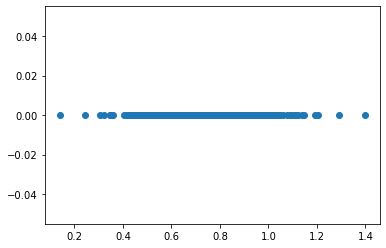

In [166]:
plt.plot( βvec, βvec*0, 'o')